# **HCAHPS Patient Survey**

National & state-level scores from 2015 to 2023 for the Hospital Consumer Assessment of Healthcare Providers and Systems (HCAHPS) survey, a national, standardized survey of hospital patients about their experiences during a recent inpatient hospital stay.

## Objective:

Analyze the Hospital Consumer Assessment of Healthcare Providers and Systems (HCAPHPS) and answer the following questions:

1. Have hospitals made improvements in their quality of care over the past 9 years?

2. Are there any specific areas where hospitals have made more progress than others?

3. Are there still any major areas of opportunity?

What recommendations can you make to hospitals to help them further improve the patient experience?



In [1]:
# Import useful libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
reports = pd.read_csv("/content/reports.csv")
reports.head(2)

,Release Period,Start Date,End Date
0,07_2015,2013-10-01,2014-09-30
1,07_2016,2014-10-01,2015-09-30


In [3]:
states =  pd.read_csv("/content/states.csv")
states.head(2)

,State,State Name,Region
0,AK,Alaska,Pacific
1,AL,Alabama,East South Central


In [4]:
measures = pd.read_csv("/content/measures.csv")
measures.head(3)

,Measure ID,Measure,Type
0,H_COMP_1,Communication with Nurses,Composite Measure
1,H_COMP_2,Communication with Doctors,Composite Measure
2,H_COMP_3,Responsiveness of Hospital Staff,Composite Measure


In [5]:
questions = pd.read_csv("/content/questions.csv")
questions.head(3)

,Question Num,Measure ID,Question,Bottom-box Answer,Middle-box Answer,Top-box Answer
0,1,H_COMP_1,"During this hospital stay, how often did nurse...",Sometimes or never,Usually,Always
1,2,H_COMP_1,"During this hospital stay, how often did nurse...",Sometimes or never,Usually,Always
2,3,H_COMP_1,"During this hospital stay, how often did nurse...",Sometimes or never,Usually,Always


In [6]:
national_results =  pd.read_csv("/content/national_results.csv")
national_results.head(3)

,Release Period,Measure ID,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
0,07_2015,H_CLEAN_HSP,8,18,74
1,07_2015,H_COMP_1,4,17,79
2,07_2015,H_COMP_2,4,14,82


In [7]:
state_results = pd.read_csv("/content/state_results.csv")
state_results.head(3)

,Release Period,State,Measure ID,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
0,07_2015,AK,H_CLEAN_HSP,8,22,70
1,07_2015,AK,H_COMP_1,9,17,74
2,07_2015,AK,H_COMP_2,10,15,75


In [8]:
responses = pd.read_csv("/content/responses.csv")
responses.head(3)

,Release Period,State,Facility ID,Completed Surveys,Response Rate (%)
0,07_2015,AL,10001,300 or more,27
1,07_2015,AL,10005,300 or more,37
2,07_2015,AL,10006,300 or more,25


### EXPLORATORY DATA ANALYSIS

In [9]:
# Know the data size

print(f"Reports data size: {reports.shape}")
print(f"States data size: {states.shape}")
print(f"Measures data size: {measures.shape}")
print(f"Questions data size: {questions.shape}")
print(f"National_results data size: {national_results.shape}")
print(f"State_results data size: {state_results.shape}")
print(f"Responses data size: {responses.shape}")



Reports data size: (9, 3)
States data size: (51, 3)
Measures data size: (10, 3)
Questions data size: (19, 6)
National_results data size: (90, 5)
State_results data size: (4580, 6)
Responses data size: (43219, 5)


In [10]:
# Find out the number of facilities that participated in this survey

number_of_facilities = len(set(responses['Facility ID']))

In [11]:
# Responses field data types

responses.dtypes

Release Period       object
State                object
Facility ID          object
Completed Surveys    object
Response Rate (%)    object
dtype: object

In [12]:
# Convert Release period to a datatime for the survey analysis

state_results['Release Period'] = pd.to_datetime(state_results['Release Period'], format='%m_%Y')


national_results['Release Period'] = pd.to_datetime(national_results['Release Period'], format = '%m_%Y')

### Group Data: State Level and National Level

In [13]:
state_level = states.merge(state_results, on = 'State').merge(measures, on = 'Measure ID').merge(questions[['Measure ID', 'Question']], on = 'Measure ID')

state_level.head(3)

,State,State Name,Region,Release Period,Measure ID,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage,Measure,Type,Question
0,AK,Alaska,Pacific,2015-07-01,H_CLEAN_HSP,8,22,70,Cleanliness of Hospital Environment,Individual Item,"During this hospital stay, how often were your..."
1,AK,Alaska,Pacific,2016-07-01,H_CLEAN_HSP,7,21,72,Cleanliness of Hospital Environment,Individual Item,"During this hospital stay, how often were your..."
2,AK,Alaska,Pacific,2017-07-01,H_CLEAN_HSP,8,20,72,Cleanliness of Hospital Environment,Individual Item,"During this hospital stay, how often were your..."


In [14]:
state_level.shape

(8702, 11)

In [15]:
state_level.isnull().sum()

State                    0
State Name               0
Region                   0
Release Period           0
Measure ID               0
Bottom-box Percentage    0
Middle-box Percentage    0
Top-box Percentage       0
Measure                  0
Type                     0
Question                 0
dtype: int64

In [16]:
national_level = national_results.merge(measures, on = 'Measure ID').merge(questions[['Measure ID', 'Question']], on = 'Measure ID')

national_level.head(3)

,Release Period,Measure ID,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage,Measure,Type,Question
0,2015-07-01,H_CLEAN_HSP,8,18,74,Cleanliness of Hospital Environment,Individual Item,"During this hospital stay, how often were your..."
1,2016-07-01,H_CLEAN_HSP,8,18,74,Cleanliness of Hospital Environment,Individual Item,"During this hospital stay, how often were your..."
2,2017-07-01,H_CLEAN_HSP,8,18,74,Cleanliness of Hospital Environment,Individual Item,"During this hospital stay, how often were your..."


In [17]:
national_level.shape

(171, 8)

In [18]:
national_level.isnull().sum()

Release Period           0
Measure ID               0
Bottom-box Percentage    0
Middle-box Percentage    0
Top-box Percentage       0
Measure                  0
Type                     0
Question                 0
dtype: int64

# **Question 1**


### 1. Have hospitals made improvements in their quality of care over the past 9 years?

To answer this question, I would analyze the individual measures that the questions fall into for the 9 years period.

In [19]:
# Print all the measures

print(measures['Measure'].unique())

['Communication with Nurses' 'Communication with Doctors'
 'Responsiveness of Hospital Staff' 'Communication about Medicines'
 'Discharge Information' 'Care Transition'
 'Cleanliness of Hospital Environment' 'Quietness of Hospital Environment'
 'Overall Hospital Rating' 'Willingness to Recommend the Hospital']


**A. Communication with Nurses**

In [20]:
# Filter for Communication with Nurses

nurse_comm = national_level[national_level['Measure']== 'Communication with Nurses']

nurse_comm.tail(3)

,Release Period,Measure ID,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage,Measure,Type,Question
33,2023-07-01,H_COMP_1,5,16,79,Communication with Nurses,Composite Measure,"During this hospital stay, how often did nurse..."
34,2023-07-01,H_COMP_1,5,16,79,Communication with Nurses,Composite Measure,"During this hospital stay, how often did nurse..."
35,2023-07-01,H_COMP_1,5,16,79,Communication with Nurses,Composite Measure,"During this hospital stay, how often did nurse..."


In [21]:
nurse_communication = nurse_comm.groupby('Release Period')[['Bottom-box Percentage', 'Middle-box Percentage', 'Top-box Percentage']].mean()

nurse_communication.head(3)

,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
Release Period,,,
2015-07-01,4.0,17.0,79.0
2016-07-01,4.0,16.0,80.0
2017-07-01,4.0,16.0,80.0


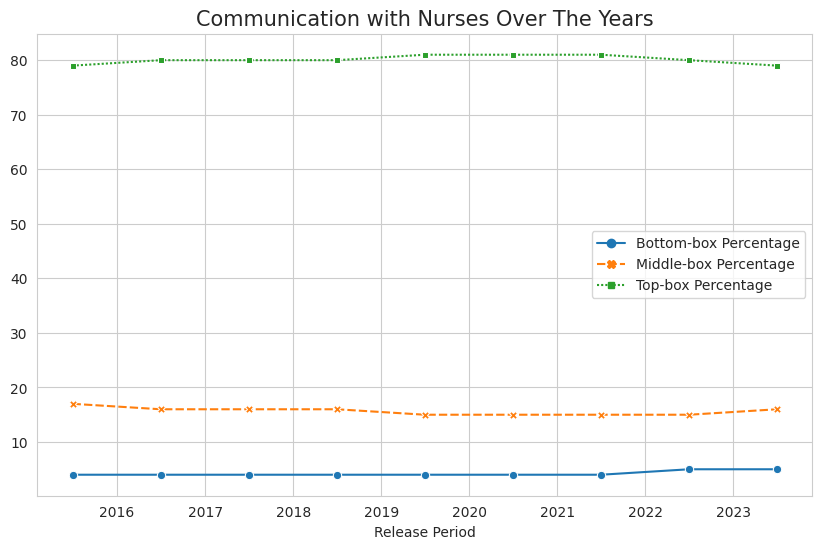

In [22]:
# Show a plot of the communication with nurses on the national level in all the facilities


plt.figure(figsize=(10, 6))
sns.set_style(style='whitegrid')
sns.lineplot(data = nurse_communication[["Bottom-box Percentage", "Middle-box Percentage", "Top-box Percentage"]], legend=True, markers=True)
#fig = plt.figure(figsize=(10, 10))
plt.title("Communication with Nurses Over The Years", size=15)
plt.show()

**B. Communication with Doctors**

In [23]:
doc_comm = national_level[national_level['Measure'] == 'Communication with Doctors']

doc_communication = doc_comm.groupby('Release Period')[["Bottom-box Percentage", "Middle-box Percentage", "Top-box Percentage"]].mean()
doc_communication.head()

,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
Release Period,,,
2015-07-01,4.0,14.0,82.0
2016-07-01,4.0,14.0,82.0
2017-07-01,4.0,14.0,82.0
2018-07-01,4.0,14.0,82.0
2019-07-01,5.0,14.0,81.0


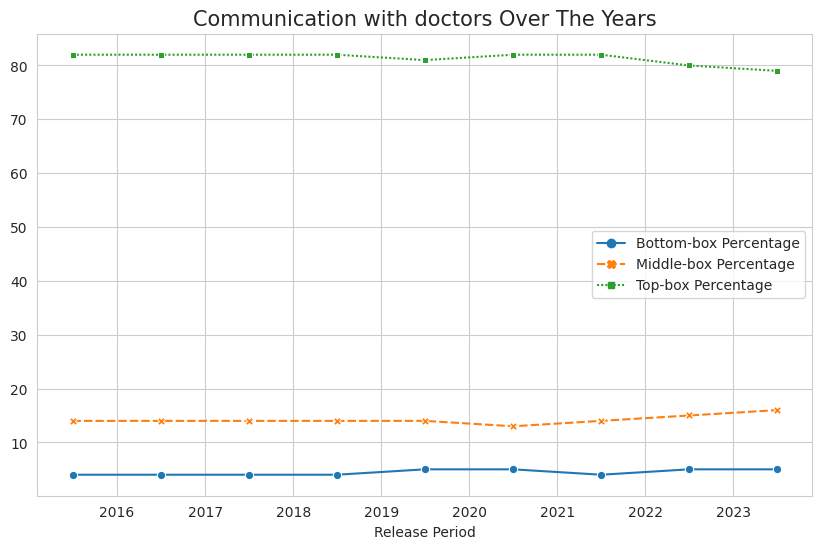

In [24]:
# Show a plot of the communication with doctors on the national level in all the facilities


plt.figure(figsize=(10, 6))
sns.set_style(style='whitegrid')
sns.lineplot(data = doc_communication[["Bottom-box Percentage", "Middle-box Percentage", "Top-box Percentage"]], legend=True, markers=True)
#fig = plt.figure(figsize=(10, 10))
plt.title("Communication with doctors Over The Years", size=15)
plt.show()

**C. Responsiveness of Hospital Staff**

In [25]:
response = national_level[national_level['Measure'] == 'Responsiveness of Hospital Staff']
responsiveness = response.groupby('Release Period')[["Bottom-box Percentage", "Middle-box Percentage", "Top-box Percentage"]].mean()

responsiveness.head(3)

,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
Release Period,,,
2015-07-01,9.0,23.0,68.0
2016-07-01,9.0,23.0,68.0
2017-07-01,8.0,23.0,69.0


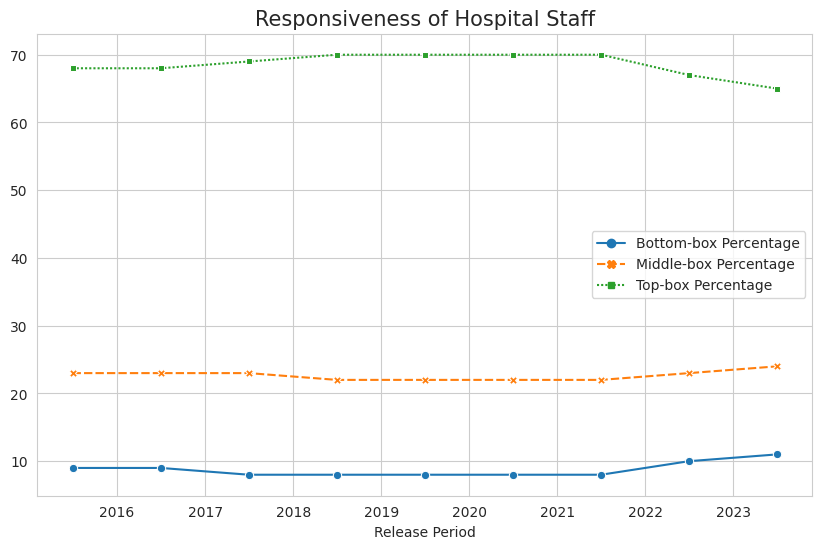

In [26]:
# Show a plot of hospital staff responsiveness on the national level in all the facilities


plt.figure(figsize=(10, 6))
sns.set_style(style='whitegrid')
sns.lineplot(data = responsiveness[["Bottom-box Percentage", "Middle-box Percentage", "Top-box Percentage"]], legend=True, markers=True)
#fig = plt.figure(figsize=(10, 10))
plt.title("Responsiveness of Hospital Staff", size=15)
plt.show()

**D. Communication about Medicines**

In [27]:
medicine_comm = national_level[national_level['Measure'] == 'Communication about Medicines']

medicine_comms = medicine_comm.groupby('Release Period')[["Bottom-box Percentage", "Middle-box Percentage", "Top-box Percentage"]].mean()
medicine_comms.head(3)

,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
Release Period,,,
2015-07-01,18.0,17.0,65.0
2016-07-01,18.0,17.0,65.0
2017-07-01,17.0,18.0,65.0


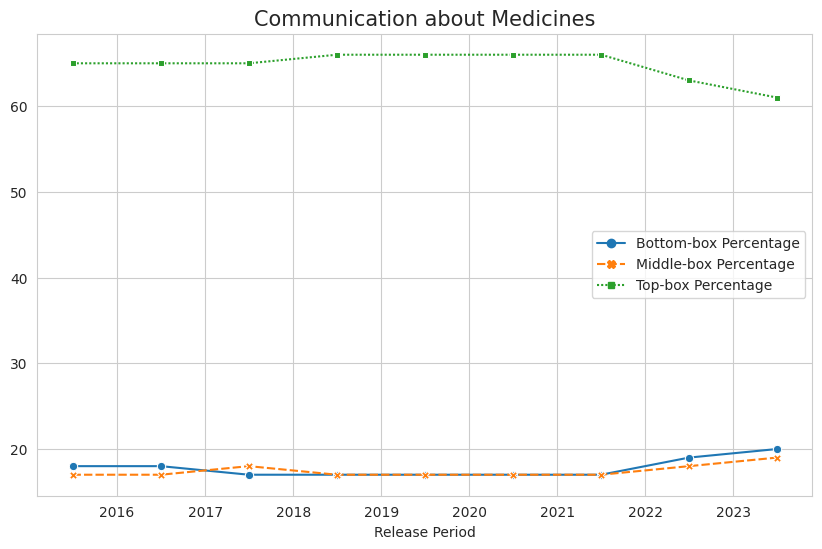

In [28]:
# Show a plot of Communication about Medicines on the national level in all the facilities


plt.figure(figsize=(10, 6))
sns.set_style(style='whitegrid')
sns.lineplot(data = medicine_comms[["Bottom-box Percentage", "Middle-box Percentage", "Top-box Percentage"]], legend=True, markers=True)
plt.title("Communication about Medicines", size=15)
plt.show()

**E. Discharge Information**

In [29]:
discharge_info = national_level[national_level['Measure'] == 'Discharge Information']

discharge_info = discharge_info.groupby('Release Period')[["Bottom-box Percentage", "Middle-box Percentage", "Top-box Percentage"]].mean()
discharge_info.head(3)

,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
Release Period,,,
2015-07-01,14.0,0.0,86.0
2016-07-01,13.0,0.0,87.0
2017-07-01,13.0,0.0,87.0


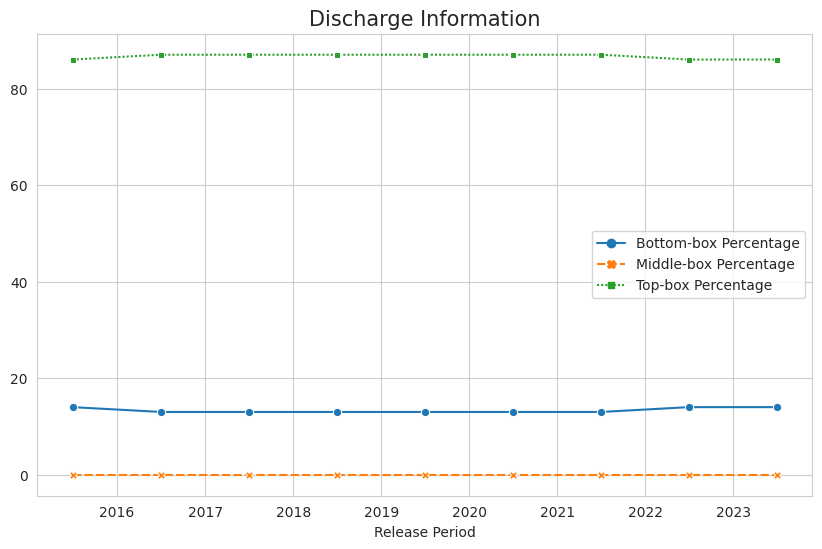

In [30]:
# Show a plot of Discharge Information on the national level in all the facilities


plt.figure(figsize=(10, 6))
sns.set_style(style='whitegrid')
sns.lineplot(data = discharge_info[["Bottom-box Percentage", "Middle-box Percentage", "Top-box Percentage"]], legend=True, markers=True)
plt.title("Discharge Information", size=15)
plt.show()

**F. Care Transition**

In [31]:
care_tran = national_level[national_level['Measure'] == 'Care Transition']
care_tran = care_tran.groupby('Release Period')[["Bottom-box Percentage", "Middle-box Percentage", "Top-box Percentage"]].mean()

care_tran.head(3)

,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
Release Period,,,
2015-07-01,5.0,43.0,52.0
2016-07-01,5.0,43.0,52.0
2017-07-01,5.0,43.0,52.0


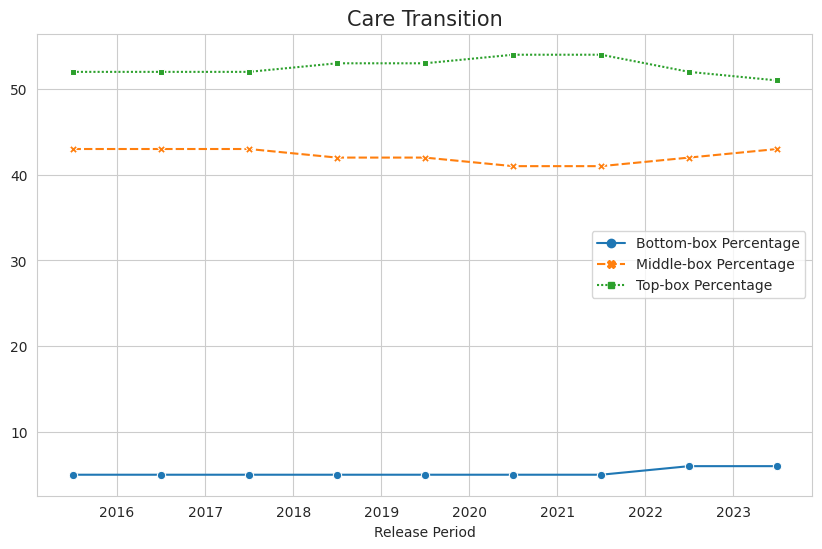

In [32]:
# Show a plot of Care Transition on the national level in all the facilities


plt.figure(figsize=(10, 6))
sns.set_style(style='whitegrid')
sns.lineplot(data = care_tran[["Bottom-box Percentage", "Middle-box Percentage", "Top-box Percentage"]], legend=True, markers=True)
plt.title("Care Transition", size=15)
plt.show()

**G. Cleanliness of Hospital Environment**

In [33]:
cleanliness = national_level[national_level['Measure'] == 'Cleanliness of Hospital Environment']
cleanliness = cleanliness.groupby('Release Period')[["Bottom-box Percentage", "Middle-box Percentage", "Top-box Percentage"]].mean()

cleanliness.head(3)

,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
Release Period,,,
2015-07-01,8.0,18.0,74.0
2016-07-01,8.0,18.0,74.0
2017-07-01,8.0,18.0,74.0


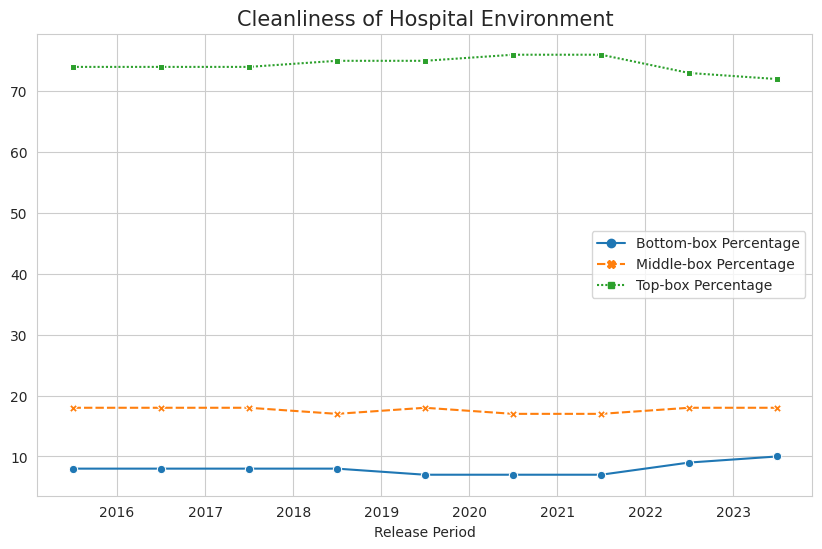

In [34]:
# Show a plot of Cleanliness of Hospital Environment on the national level in all the facilities


plt.figure(figsize=(10, 6))
sns.set_style(style='whitegrid')
sns.lineplot(data = cleanliness[["Bottom-box Percentage", "Middle-box Percentage", "Top-box Percentage"]], legend=True, markers=True)
plt.title("Cleanliness of Hospital Environment", size=15)
plt.show()

**H. Quietness of Hospital Environment**

In [35]:
quietness = national_level[national_level['Measure'] == 'Quietness of Hospital Environment']
quietness = quietness.groupby('Release Period')[["Bottom-box Percentage", "Middle-box Percentage", "Top-box Percentage"]].mean()

quietness.head(3)

,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
Release Period,,,
2015-07-01,9.0,29.0,62.0
2016-07-01,9.0,29.0,62.0
2017-07-01,9.0,28.0,63.0


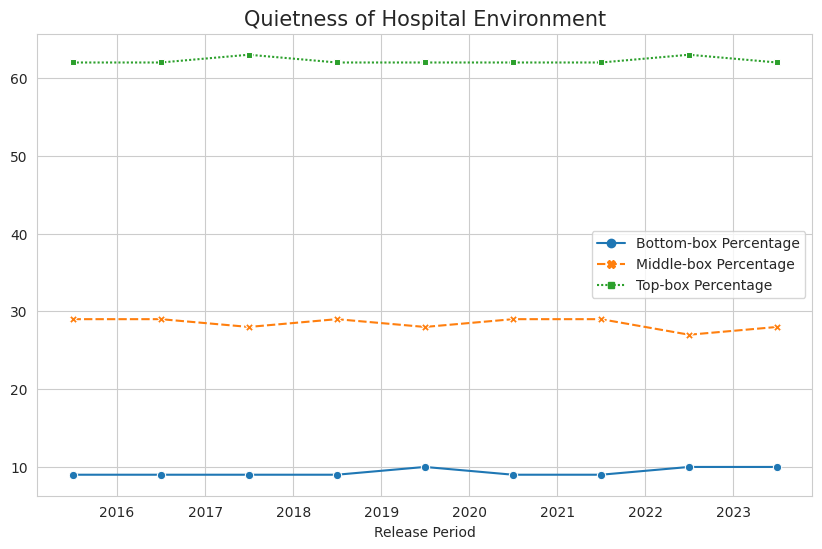

In [36]:
# Show a plot of Quietness of Hospital Environment on the national level in all the facilities


plt.figure(figsize=(10, 6))
sns.set_style(style='whitegrid')
sns.lineplot(data = quietness[["Bottom-box Percentage", "Middle-box Percentage", "Top-box Percentage"]], legend=True, markers=True)
plt.title("Quietness of Hospital Environment", size=15)
plt.show()

**I. Overall Hospital Rating**

In [37]:
rating = national_level[national_level['Measure'] == 'Overall Hospital Rating']

rating = rating.groupby('Release Period')[["Bottom-box Percentage", "Middle-box Percentage", "Top-box Percentage"]].mean()
rating.head(3)

,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
Release Period,,,
2015-07-01,8.0,21.0,71.0
2016-07-01,8.0,20.0,72.0
2017-07-01,7.0,20.0,73.0


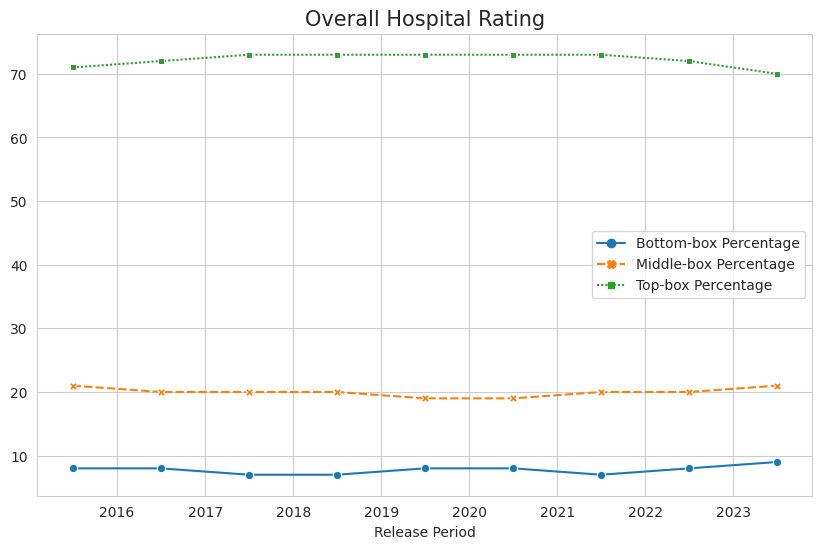

In [38]:
# Show a plot of Overall Hospital Rating on the national level in all the facilities


plt.figure(figsize=(10, 6))
sns.set_style(style='whitegrid')
sns.lineplot(data = rating[["Bottom-box Percentage", "Middle-box Percentage", "Top-box Percentage"]], legend=True, markers=True)
plt.title("Overall Hospital Rating", size=15)
plt.show()

**J. Willingness to Recommend the Hospital**

In [39]:
refer_hospital = national_level[national_level['Measure'] == 'Willingness to Recommend the Hospital']
refer_hospital = refer_hospital.groupby('Release Period')[["Bottom-box Percentage", "Middle-box Percentage", "Top-box Percentage"]].mean()

refer_hospital.head(3)

,Bottom-box Percentage,Middle-box Percentage,Top-box Percentage
Release Period,,,
2015-07-01,5.0,24.0,71.0
2016-07-01,5.0,24.0,71.0
2017-07-01,5.0,23.0,72.0


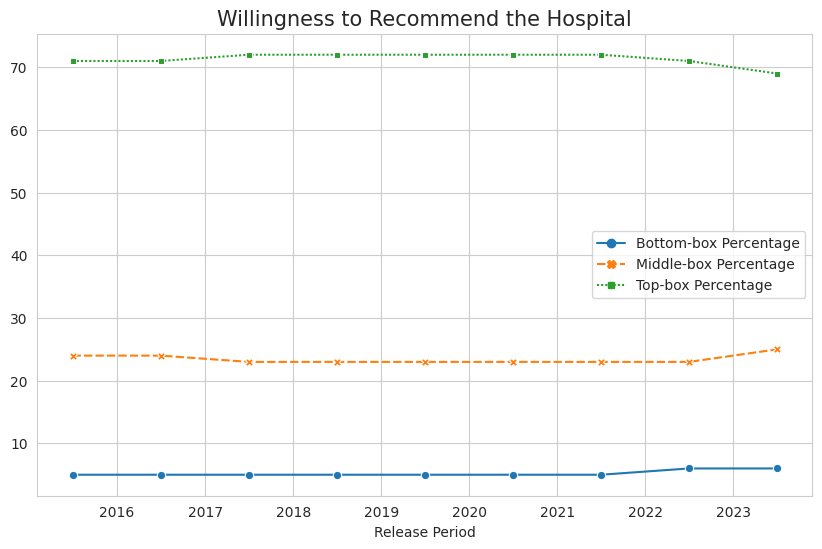

In [40]:
# Show a plot of Willingness to Recommend the Hospital on the national level in all the facilities


plt.figure(figsize=(10, 6))
sns.set_style(style='whitegrid')
sns.lineplot(data = refer_hospital[["Bottom-box Percentage", "Middle-box Percentage", "Top-box Percentage"]], legend=True, markers=True)
plt.title("Willingness to Recommend the Hospital", size=15)
plt.show()

Over the past 9 years, it can be seen that hospitals have not made any significant improvement in their quality. Using the Top-box Percentage as our baseline, It can be seen that from communication with nurses, to doctors to communication of drugs, they are declined to what their were at the beginning or even worst.

Hoewver, we did see some improvement in some measures in the precceding years before the current year 2023 for measures like responsiveness of hospital staff, cleanliness of hospital environment, care transition, willingness to recommend the hospital, and overall hospital rating.



In [41]:
# To get a better perspective of the percentage increase or change from the startimg year and the current year

national_level = national_level.groupby(['Release Period', 'Measure'], as_index=False)["Top-box Percentage"].mean()

national_level.head()

,Release Period,Measure,Top-box Percentage
0,2015-07-01,Care Transition,52.0
1,2015-07-01,Cleanliness of Hospital Environment,74.0
2,2015-07-01,Communication about Medicines,65.0
3,2015-07-01,Communication with Doctors,82.0
4,2015-07-01,Communication with Nurses,79.0


In [42]:
# Get minimum and maximum survey dates

national_level['Release Period'].min(), national_level['Release Period'].max()

(Timestamp('2015-07-01 00:00:00'), Timestamp('2023-07-01 00:00:00'))

In [43]:
table = pd.pivot_table(national_level, index = ['Measure'], columns='Release Period', values='Top-box Percentage')
# table = table.reset_index().rename_axis(None, axis=1)
new_table = pd.DataFrame(table.to_records())

new_table.head(2)

,Measure,2015-07-01 00:00:00,2016-07-01 00:00:00,2017-07-01 00:00:00,2018-07-01 00:00:00,2019-07-01 00:00:00,2020-07-01 00:00:00,2021-07-01 00:00:00,2022-07-01 00:00:00,2023-07-01 00:00:00
0,Care Transition,52.0,52.0,52.0,53.0,53.0,54.0,54.0,52.0,51.0
1,Cleanliness of Hospital Environment,74.0,74.0,74.0,75.0,75.0,76.0,76.0,73.0,72.0


In [44]:
new_table['2015-07-01 00:00:00']

0    52.0
1    74.0
2    65.0
3    82.0
4    79.0
5    86.0
6    71.0
7    62.0
8    68.0
9    71.0
Name: 2015-07-01 00:00:00, dtype: float64

In [45]:
# Get the percentage change in improvemnet of these facilities

new_table['Percentage Change'] = (new_table['2023-07-01 00:00:00'] - new_table['2015-07-01 00:00:00']) * 100 / new_table['2023-07-01 00:00:00']

new_table['Percentage Change'] = new_table['Percentage Change'].apply(lambda x:round(x, 0))

new_table[['Measure', 'Percentage Change']].sort_values(by='Percentage Change', ascending=False)

,Measure,Percentage Change
4,Communication with Nurses,0.0
5,Discharge Information,0.0
7,Quietness of Hospital Environment,0.0
6,Overall Hospital Rating,-1.0
0,Care Transition,-2.0
1,Cleanliness of Hospital Environment,-3.0
9,Willingness to Recommend the Hospital,-3.0
3,Communication with Doctors,-4.0
8,Responsiveness of Hospital Staff,-5.0
2,Communication about Medicines,-7.0


Having in mind thatthe above data shows the percentage change on the national level, taking the measure with the least performance, confirm which states did better that which states.

In [46]:
medicine_com = state_level[state_level['Measure'] == 'Communication about Medicines']

medicine_com = medicine_com.groupby(['Release Period', 'State Name'], as_index=False)["Top-box Percentage"].mean()
medicine_com.head(3)

,Release Period,State Name,Top-box Percentage
0,2015-07-01,Alabama,67.0
1,2015-07-01,Alaska,64.0
2,2015-07-01,Arizona,64.0


In [47]:
pivot_table = pd.pivot_table(medicine_com, index = ['State Name'], columns='Release Period', values='Top-box Percentage')
state_table = pd.DataFrame(pivot_table.to_records())

# Get the percentage change in improvemnet for each state

state_table['Percentage Change'] = (state_table['2023-07-01 00:00:00'] - state_table['2015-07-01 00:00:00']) * 100 / state_table['2023-07-01 00:00:00']

state_table['Percentage Change'] = state_table['Percentage Change'].apply(lambda x:round(x, 0))

state_table[['State Name', 'Percentage Change']].sort_values(by='Percentage Change', ascending=False)


,State Name,Percentage Change
28,Nevada,3.0
26,Montana,2.0
34,North Dakota,2.0
23,Minnesota,-2.0
1,Alaska,-2.0
37,Oregon,-3.0
27,Nebraska,-3.0
18,Louisiana,-3.0
16,Kansas,-3.0
36,Oklahoma,-3.0


It can be seen from the above table that some states improved way better in their communication of medicines than other states.However, most of the states performed poorly.

Nevada, Montana, and North Dakota are the states where communication of medicines improved by 3%, 2% and 2% respctively by the 9th year the survey was taken.

# **Question 2**


### 2. Are there any specific areas where hospitals have made more progress than others?

In [48]:
# Get the growth percentage from the first time the survey was given to the current year to see how which areas improved more and which didnt

new_table[['Measure', 'Percentage Change']].sort_values(by='Percentage Change', ascending=False)

,Measure,Percentage Change
4,Communication with Nurses,0.0
5,Discharge Information,0.0
7,Quietness of Hospital Environment,0.0
6,Overall Hospital Rating,-1.0
0,Care Transition,-2.0
1,Cleanliness of Hospital Environment,-3.0
9,Willingness to Recommend the Hospital,-3.0
3,Communication with Doctors,-4.0
8,Responsiveness of Hospital Staff,-5.0
2,Communication about Medicines,-7.0


The above table shows that hospitals have not made a lot of progress compared to the first year the survey was taken. However, Some areas have been maintained while some areas, they have fallen short of the statndard they had to start with.

In [49]:
# Print areas with no improvement compared to the first year of the survey

no_improvement_measures = new_table.loc[:, ['Measure', 'Percentage Change']]

print(no_improvement_measures[no_improvement_measures['Percentage Change'] < 0])

                                 Measure  Percentage Change
0                        Care Transition               -2.0
1    Cleanliness of Hospital Environment               -3.0
2          Communication about Medicines               -7.0
3             Communication with Doctors               -4.0
6                Overall Hospital Rating               -1.0
8       Responsiveness of Hospital Staff               -5.0
9  Willingness to Recommend the Hospital               -3.0


# **Question 3**

### Are there still any major areas of opportunity?


From the analysis, it is evidentthat there is plenty room for opportunites and improvement for the facilities especially in areas like Communication about Medicines with -7% decline in quality, responsiveness of hospital staff -5% decline and communication with doctors -4% decline.

While a patient is sick these are key factors that aid improvement, effective communicatio with doctors on diagnosis, communication of drugs to be taken, when, how it be taken, dos and don't and finally while on admission the responsiveness of hospital staff play a vital role in the recovery of patients.  

# **Conclusion:**

1. The Hospital Consumer Assessment of Healthcare Providers and Systems (HCAHPS) survey on a national level shows that there is need for hospitals to pay more attention to the entirety of care paid to patients.

2. The analysis shows that in the past 9 years, there have been little or no improvement in the quality of care given to patients and this calls for attention.

3. The state  level analysis done for communication about medicines in the different facilities shows that some states had some improvement in the communication of medicines in the past years, however, some states did very poorly and worse than they performed at the beginning of the survey year.
This calls for attention of the goverment and health govverning bodies to pay more attention to te healthcare sector.